In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings

#"""Step 1: Data Cleaning and Preparation"""
# Load the data
file_path = r'C:\Users\Main Profile\Downloads\RTA\cleaned.csv'
df = pd.read_csv(file_path)

# Inspect the data
print(df.info())
print(df.head())

# Handle missing values if any
df = df.dropna()  # Or use other imputation methods if appropriate

# Convert categorical fields to category dtype
categorical_columns = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation',
                       'Driving_experience', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
                       'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
                       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']
df[categorical_columns] = df[categorical_columns].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

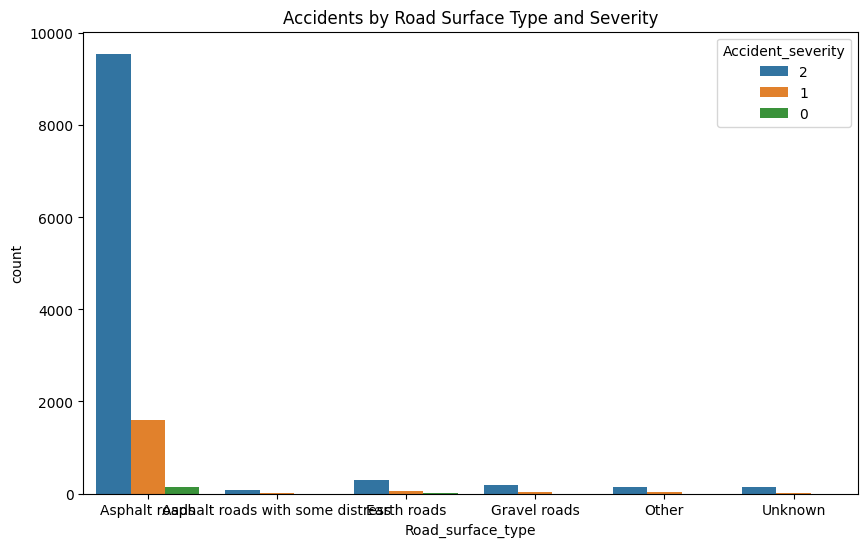

In [26]:
# Convert 'Accident_severity' column to string type
df['Accident_severity'] = df['Accident_severity'].astype(str)

# Visualize the distribution of accidents by road conditions, weather, and time of day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Road_surface_type', hue='Accident_severity')
plt.title('Accidents by Road Surface Type and Severity')
plt.show()


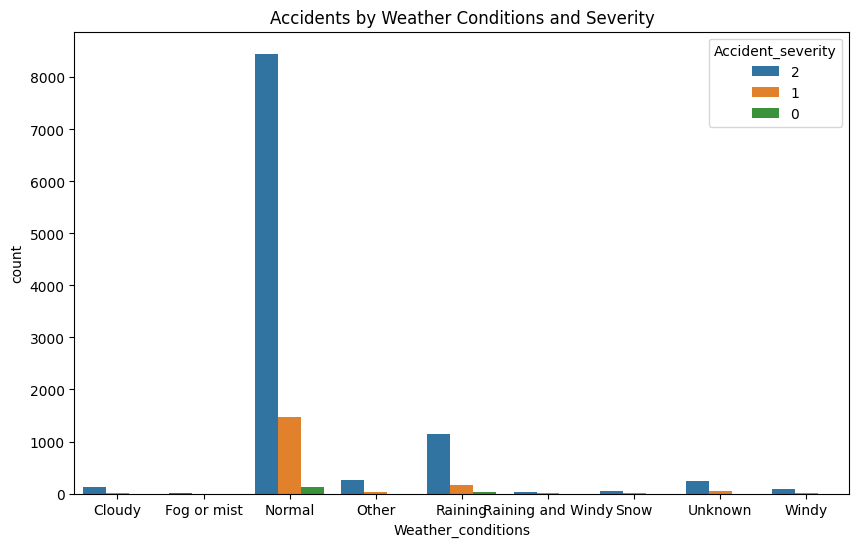

In [27]:
# Convert 'Accident_severity' column to string type
df['Accident_severity'] = df['Accident_severity'].astype(str)

# Visualize distribution of accidents by weather conditions and severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather_conditions', hue='Accident_severity')
plt.title('Accidents by Weather Conditions and Severity')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


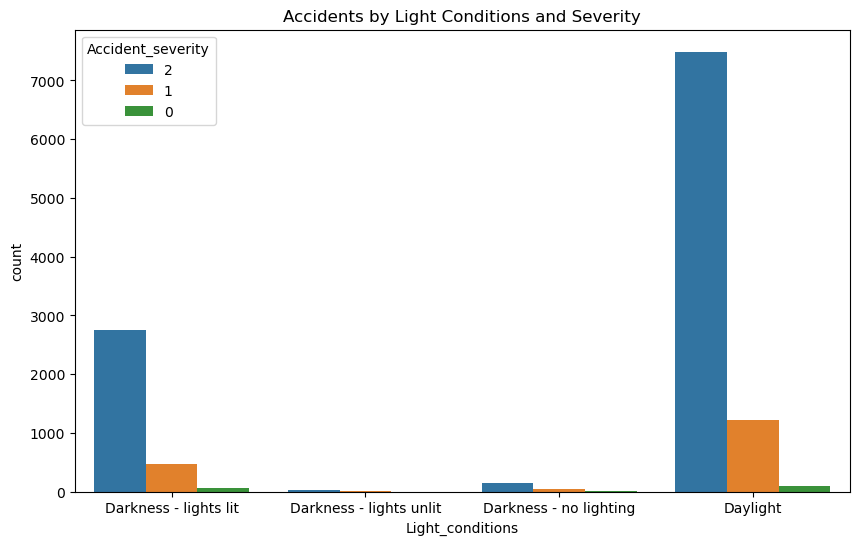

In [6]:
# Convert 'Accident_severity' column to string type
df['Accident_severity'] = df['Accident_severity'].astype(str)

# Visualize distribution of accidents by light conditions and severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Light_conditions', hue='Accident_severity')
plt.title('Accidents by Light Conditions and Severity')
plt.show()


In [28]:
"""Step 3: Pattern Analysis"""
# Cross-tabulation to see the relationship between different conditions and accident severity
road_weather_severity = pd.crosstab(df['Road_surface_type'], [df['Weather_conditions'], df['Accident_severity']])
print(road_weather_severity)
# Further analysis can include correlation, chi-square tests, etc.


Weather_conditions               Cloudy      Fog or mist    Normal        \
Accident_severity                     1    2           1  2      0     1   
Road_surface_type                                                          
Asphalt roads                         8  106           1  5    126  1350   
Asphalt roads with some distress      0    0           0  1      1     5   
Earth roads                           0    2           0  2      7    40   
Gravel roads                          0    2           0  0      0    40   
Other                                 0    4           0  0      1    20   
Unknown                               0    3           0  1      0    19   

Weather_conditions                     Other      Raining             \
Accident_severity                    2     1    2       0    1     2   
Road_surface_type                                                      
Asphalt roads                     7759    25  252      22  148  1049   
Asphalt roads with some dis

In [29]:
#"""Step 4: Hotspot Identification"""
# Check if latitude and longitude columns exist
if 'latitude' in df.columns and 'longitude' in df.columns:
    # Load the geospatial data
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

    # Plot accident hotspots
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = world.plot(figsize=(10, 6))
    gdf.plot(ax=ax, color='red', alpha=0.5, markersize=10)
    plt.title('Accident Hotspots')
    plt.show()
else:
    print("Latitude and longitude columns are not available in the dataset for geospatial analysis.")


Latitude and longitude columns are not available in the dataset for geospatial analysis.


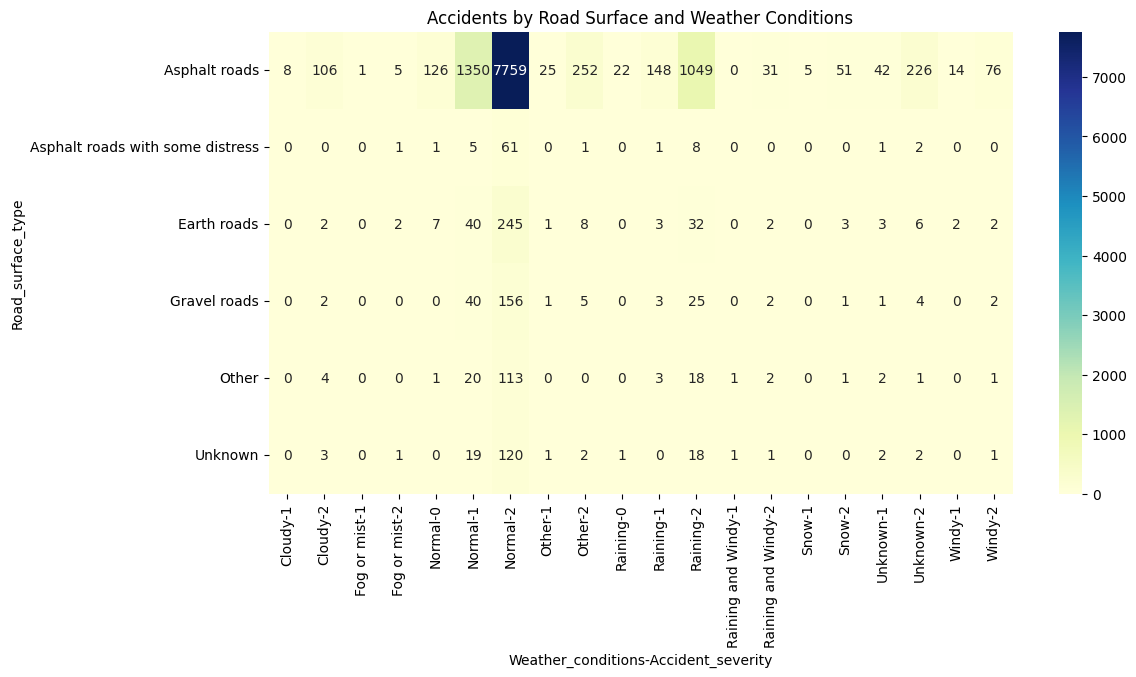

In [30]:
"""Step 5: Visualization"""
# Example visualizations of contributing factors
plt.figure(figsize=(12,6))
sns.heatmap(road_weather_severity, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Accidents by Road Surface and Weather Conditions')
plt.show()

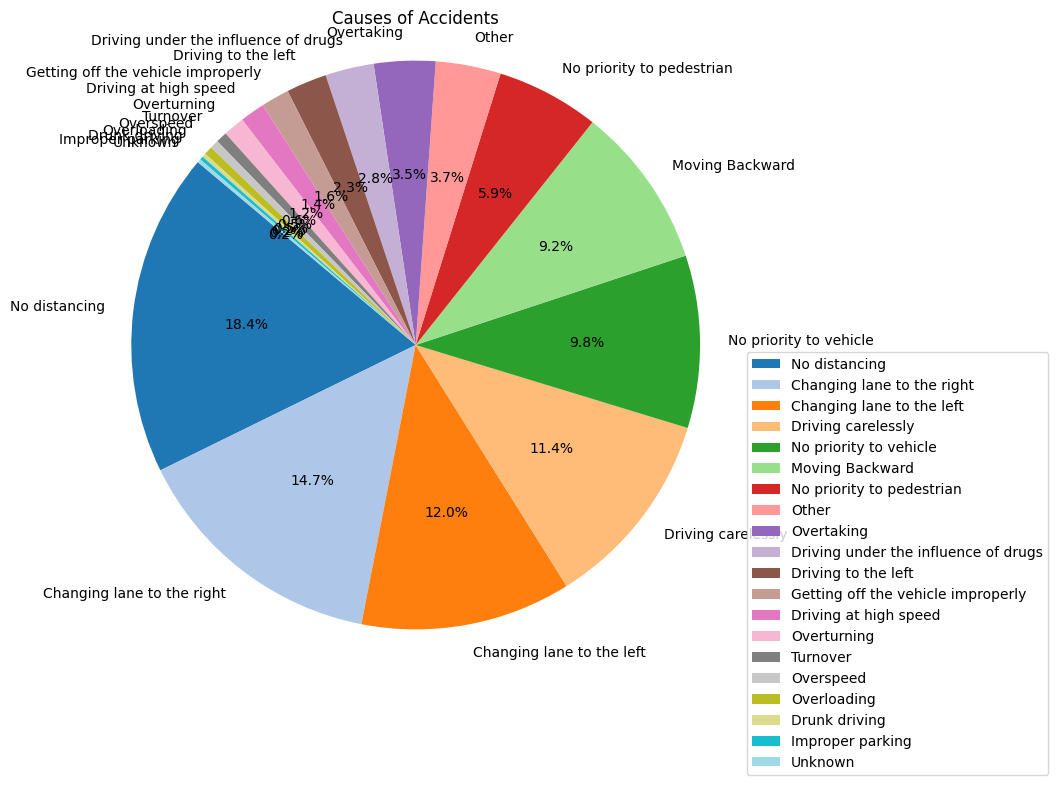

In [31]:
"""Step 6: Causes of Accident Visualization"""
# Plot the causes of accidents in a pie chart
cause_counts = df['Cause_of_accident'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20'))
plt.title('Causes of Accidents')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()